In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
X = digits.data
Y = digits.target
print(X.shape, Y.shape)

(1797, 64) (1797,)


In [ ]:
#Normalización
print(X.max(),X.min())
X /= 16.0
print(X.min(), X.max())

16.0 0.0
0.0 1.0


In [ ]:
#Division dataset
from sklearn.model_selection import train_test_split#60,20,20

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.6)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, train_size = 0.5)
print( x_train.shape, x_val.shape, x_test.shape)
print( y_train.shape, y_val.shape, y_test.shape)
print("Y train:",y_train)
print("X train - Y train",x_train[0], y_train[0])

(1078, 64) (360, 64) (359, 64)
(1078,) (360,) (359,)
Y train: [5 4 2 ... 1 7 5]
X train - Y train [0.     0.     0.875  0.75   0.75   0.75   0.375  0.     0.     0.125
 0.9375 0.5    0.5    0.5    0.25   0.     0.     0.3125 0.75   0.
 0.     0.     0.     0.     0.     0.5    1.     0.75   0.6875 0.4375
 0.     0.     0.     0.0625 0.25   0.25   0.5625 0.9375 0.4375 0.
 0.     0.     0.     0.     0.     0.5    0.5    0.     0.     0.0625
 0.6875 0.25   0.3125 0.875  0.4375 0.     0.     0.     0.75   1.
 1.     0.5    0.0625 0.    ] 5


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.8)
print(x_train.shape, x_val.shape, x_test.shape)

x_train = x_train.reshape((len(x_train), x_train.shape[1] * x_train.shape[2]))
x_val = x_val.reshape((len(x_val), x_val.shape[1]* x_val.shape[2]))

print(x_train.shape, x_val.shape, x_test.shape)

(48000, 28, 28) (12000, 28, 28) (10000, 28, 28)
(48000, 784) (12000, 784) (10000, 28, 28)


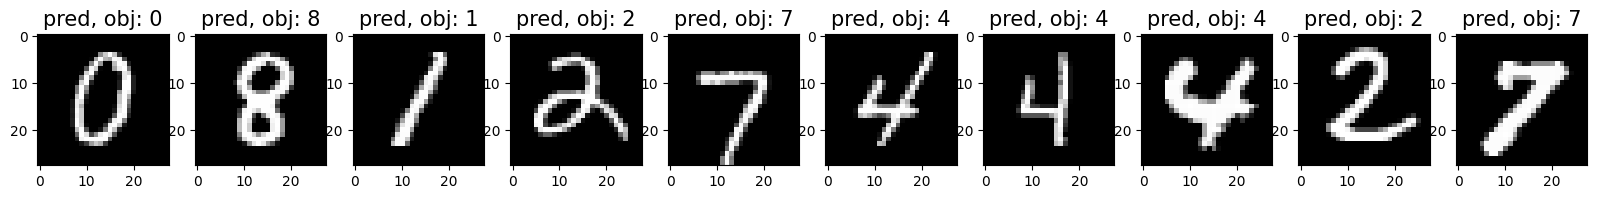

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(20,4))

inicial = 0

for index, (imagen, etiqueta) in enumerate(zip(x_train[inicial:inicial+10], y_train[inicial:inicial+10])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(np.reshape(imagen, (28,28)), cmap=plt.cm.gray)
 plt.title('pred, obj: ' +str(etiqueta), fontsize = 15)

In [ ]:
print(y_train[56])
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
#y_val = y_val.reshape((len(y_val), y_val.shape[1] * x_train.shape[2]))
y_test = to_categorical(y_test, 10)
print(y_train[56])


0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))

model.add(Dense(10, activation='softmax'))

In [ ]:
import  tensorflow as tf
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3), metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 200 , batch_size = 256, verbose = 2)

Epoch 1/200
188/188 - 6s - loss: 0.9751 - accuracy: 0.7739 - val_loss: 0.3935 - val_accuracy: 0.9030 - 6s/epoch - 29ms/step
Epoch 2/200
188/188 - 5s - loss: 0.3184 - accuracy: 0.9166 - val_loss: 0.2899 - val_accuracy: 0.9186 - 5s/epoch - 28ms/step
Epoch 3/200
188/188 - 4s - loss: 0.2549 - accuracy: 0.9271 - val_loss: 0.2508 - val_accuracy: 0.9245 - 4s/epoch - 23ms/step
Epoch 4/200
188/188 - 4s - loss: 0.2222 - accuracy: 0.9348 - val_loss: 0.2249 - val_accuracy: 0.9326 - 4s/epoch - 23ms/step
Epoch 5/200
188/188 - 5s - loss: 0.2120 - accuracy: 0.9377 - val_loss: 0.2227 - val_accuracy: 0.9345 - 5s/epoch - 28ms/step
Epoch 6/200
188/188 - 4s - loss: 0.2001 - accuracy: 0.9410 - val_loss: 0.2042 - val_accuracy: 0.9394 - 4s/epoch - 23ms/step
Epoch 7/200
188/188 - 5s - loss: 0.1976 - accuracy: 0.9396 - val_loss: 0.2119 - val_accuracy: 0.9345 - 5s/epoch - 29ms/step
Epoch 8/200
188/188 - 4s - loss: 0.1796 - accuracy: 0.9455 - val_loss: 0.1923 - val_accuracy: 0.9426 - 4s/epoch - 23ms/step
Epoch 9/